# Figure 9 - CW LIFUS neuromodulatory effects on STN neuron at low acoustic intensities

Compute the temporal firing rate profiles of an STN neuron over a narrow range of low acoustic intensities, from SONIC model predictions.

### Matplotlib parameters

In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'arial'

### Imports

In [2]:
import os
import logging
import numpy as np
import matplotlib.pyplot as plt
from PySONIC.utils import logger, Intensity2Pressure
from PySONIC.plt import CompTimeSeries, GroupedTimeSeries
from PySONIC.core import NeuronalBilayerSonophore
from PySONIC.neurons import getPointNeuron
from utils import saveFigsAsPDF, cm2inch

Set high logging level to avoid extra logging

In [3]:
logger.setLevel(logging.ERROR)

### Input directory

In [4]:
inputdir = input('Select input directory: ')

Select input directory:  C:\Users\lemaire\Documents\SONIC paper data new\STN


### Plot parameters

In [10]:
figindex = 9
FR_figsize = cm2inch(20, 8)
trace_figsize = cm2inch(14, 6)
fs = 12
figs = {}

### Simulation parameters

In [11]:
a = 32e-9       # m
Fdrive = 500e3  # Hz
tstim = 1.0     # s
toffset = 0.0   # s
PRF = 100.0     # s
DC = 1.0
cov = 1.0
pneuron = getPointNeuron('STN')
nbls = NeuronalBilayerSonophore(a, pneuron)

## Panel A: firing rate profiles as a function of acoustic amplitude

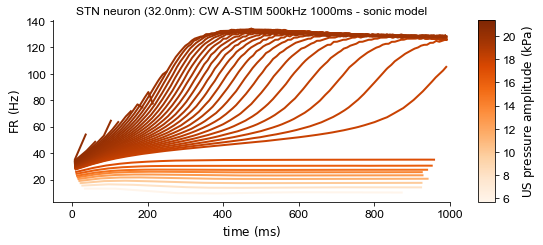

In [12]:
intensities = np.hstack((
        np.arange(10, 101, 10),
        np.arange(101, 131, 1),
        np.array([140])))  # W/m2
amps = Intensity2Pressure(intensities)  # Pa
fnames = ['{}.pkl'.format(nbls.filecode(Fdrive, A, tstim, toffset, PRF, DC, cov, 'sonic')) for A in amps]
fpaths = [os.path.join(inputdir, fn) for fn in fnames]

fig = CompTimeSeries(fpaths, 'FR').render(
    patches='none', cmap='Oranges', trange=(0, tstim), figsize=FR_figsize, fs=fs)
figs['a'] = fig

## Panel B: charge density profiles for characteristic acoustic amplitudes

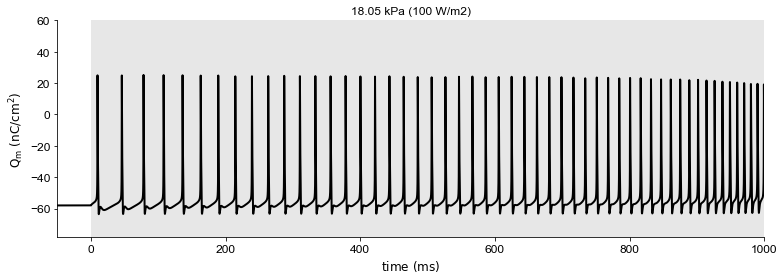

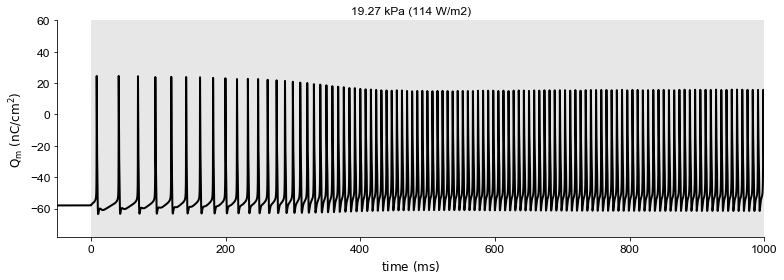

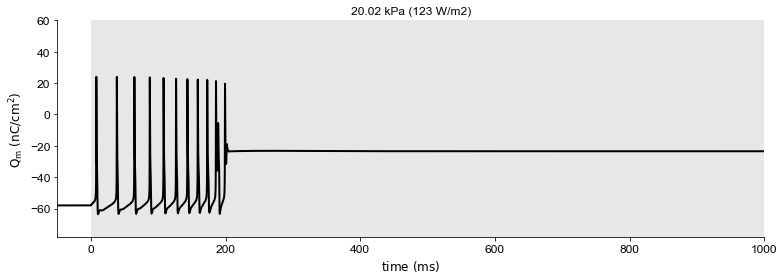

In [13]:
intensities = np.array([100, 114, 123])  # W/m2
amps = Intensity2Pressure(intensities)  # Pa
fnames = ['{}.pkl'.format(nbls.filecode(Fdrive, A, tstim, toffset, PRF, DC, cov, 'sonic')) for A in amps]
fpaths = [os.path.join(inputdir, fn) for fn in fnames]
figtraces = GroupedTimeSeries(fpaths, pltscheme={'Q_m': ['Qm']}).render(fs=fs)

for (I, A), fig in zip(zip(intensities, amps), figtraces):
    fig.axes[0].set_title(f'{A * 1e-3:.2f} kPa ({I:.0f} W/m2)')
    figs[f'b_Qtrace_{I:.0f}_W_per_m2'] = fig

### Save figure panels

Save figure panels as **pdf** in the *figs* sub-folder:

In [14]:
saveFigsAsPDF(figs, figindex)